In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [3]:
df = pd.read_csv('data/stud.csv')

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
X = df.drop(columns=['math_score'],axis = 1)

In [6]:
y = df['math_score']

In [7]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [8]:
y.head()

0    72
1    69
2    90
3    47
4    76
Name: math_score, dtype: int64

In [9]:
num_features =  X.select_dtypes(exclude='object').columns
cat_features =  X.select_dtypes(exclude='object').columns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()
preprocessor = ColumnTransformer(
  [
      ('OneHotEncoder', oh_transformer, cat_features),
      ('StandardScaler', numeric_transformer,num_features)
  ]  
    
)



In [10]:
X = preprocessor.fit_transform(X)

In [11]:
X.shape

(1000, 151)

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((800, 151), (200, 151))

In [13]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [14]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 7.8301
- Mean Absolute Error: 6.2872
- R2 Score: 0.7280
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 9.7757
- Mean Absolute Error: 7.9516
- R2 Score: 0.6073


Lasso
Model performance for Training set
- Root Mean Squared Error: 8.6808
- Mean Absolute Error: 6.9821
- R2 Score: 0.6658
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 8.8751
- Mean Absolute Error: 7.3635
- R2 Score: 0.6763


Ridge
Model performance for Training set
- Root Mean Squared Error: 7.8737
- Mean Absolute Error: 6.3800
- R2 Score: 0.7250
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 9.3038
- Mean Absolute Error: 7.6834
- R2 Score: 0.6443


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 7.4668
- Mean Absolute Error: 6.0158
- R2 Score: 0.7527
-----------------------

In [15]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
8,AdaBoost Regressor,0.681733
1,Lasso,0.676304
2,Ridge,0.644280
7,CatBoosting Regressor,0.625026
0,Linear Regression,0.607276
3,K-Neighbors Regressor,0.595483
5,Random Forest Regressor,0.569505
6,XGBRegressor,0.537276
4,Decision Tree,0.439448


In [16]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 60.73


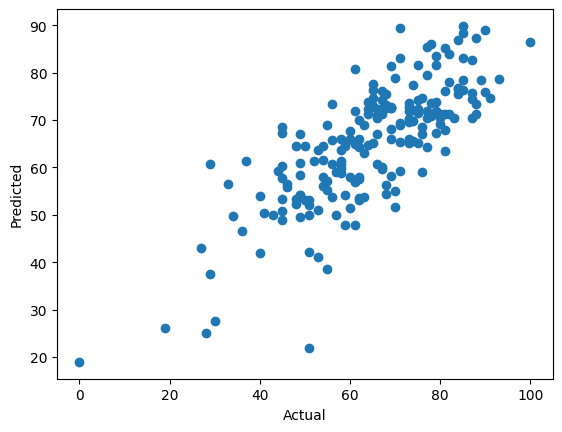

In [17]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

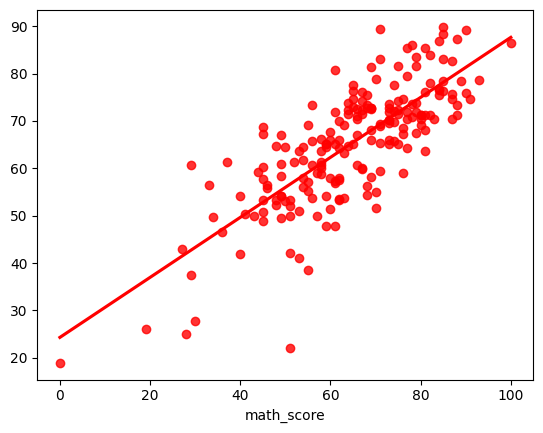

In [18]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

In [19]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,74.631501,16.368499
737,53,63.609896,-10.609896
740,80,70.367910,9.632090
660,74,69.817011,4.182989
411,84,75.491990,8.508010
...,...,...,...
408,52,61.257021,-9.257021
332,62,53.202381,8.797619
208,74,77.496735,-3.496735
613,65,72.962808,-7.962808
